# Lord of the Machines Hackathon : Predicting Click Rates
*Date: March 24th - April 1st 11:59PM , 2018 IST*

#### *A Solution by Aparna Shastry*

[github](https://github.com/aparnack/data_science)       
[twitter](https://twitter.com/aparsha2303)         
[LinkedIn](https://www.linkedin.com/in/aparnacshastry/)        
[Email](mailto:aparnashastrymls@gmail.com)

Location: Orange County, California

## Problem Statement

This is copied from the analyticsvidhya website.

Email Marketing is still the most successful marketing channel and the essential element of any digital marketing strategy. Marketers spend a lot of time in writing that perfect email, labouring over each word, catchy layouts on multiple devices to get them best in-industry open rates & click rates.

How can I build my campaign to increase the click-through rates of email? - a question that is often heard when marketers are creating their email marketing plans.

Can we optimize our email marketing campaigns with Data Science?

It's time to unlock marketing potential and build some exceptional data-science products for email marketing.

Analytics Vidhya sends out marketing emailers for various events such as conferences, hackathons, etc. We have provided a sample of user-email interaction data from July 2017 to December 2017. You are required to predict the click probability of links inside a mailer for email campaigns from January 2018 to March 2018.

## Evaluation Metric

The evaluation metric for this competition is AUC-ROC score.

## Data Description

campaign_data.csv - Contains the features related to 52 email Campaigns


campaign_id, communication_type, total_links, no_of_internal_links (redirecting to analyticsvidhya.com), no_of_images, no_of_sections, email_body, subject, email_url (opens the real email)

train.csv - Contains the click and open information for each user corresponding to given campaign id (Jul 17 - Dec 17)

id --> Unique ID for email session    
user_id --> User ID      
campaign_id --> Email Campaign ID     
send_date --> Time stamp for email sent    
is_open --> Did not open - 0, Opened -1    
is_click --> Did not click - 0, clicked - 1           

test.csv

Contains the user and campaigns for which is_click needs to be predicted (Jan 18 - Mar 18)        

id --> Unique ID for email session        
campaign_id --> Email Campaign ID          
user_id --> User ID           
send_date --> Time stamp for email sent               


## Public and Private Scoring
Note that the test data is further randomly divided into Public (30%) and Private (70%) data. Your initial responses will be checked and scored on the Public data.

For sake of completion, these two sections below:

### Rules of participation
+ The contest starts Saturday, 24th March 2018, 00:00:00 (GMT). The data set and the problem statement will be released at the same time.
+ Entries submitted after the contest is closed, will not be considered.
+ Use of external dataset and id variables is not allowed for creating model (campaign_id and user_id cannot be directly used as a feature)
+ Participation is free-of-charge.
+ Final prizes would be decided after code review and presentation of the solution to AV over a zoom call

### Final Submission
+ Setting final submission is mandatory. Without a final submission, your entry will not be considered.
+ Code file is mandatory while sending final submission. For GUI based tools, please upload a zip file of snapshots of steps taken by you, else upload code file.
+ The code file uploaded should be pertaining to your final submission. 

# My Solution

This solution presents an approach of training two classifiers and combining the results.      

My solution comes by doing a lot EDA and observing a few things about the dataset. **In one sentence, I just applied [total probability theorem](https://en.wikipedia.org/wiki/Law_of_total_probability) (TPT) and trianed two separate classifiers on two types of users.** In the hindsight, for the sake of competition, I should have trained 3 classifiers for three groups of users.

TPT: P(A) = P(A|A1) \* P(A1) + P(A|A2) \* P(A2) + P(A|A3) \* P(A3), with P(A1) + P(A2) + P(A3) = 1 , A1, A2, A3 mutually exclusive and collectively exhaustive

Identified 3 groups of users in test set:       

+ A1 - Common users in train and test set both, who have past click rate > 0
+ A2 - New users in test set, who were never in Train set.
+ A3 - Common users in train and test set both, who have past click rate = 0.

P(A) - Probability of clicking an email campaign      

I have two classifiers, for A1 and A2, had none for A3 in this solution. I am yet to understand how important in real life it is to train for A3, if they have consistently showed no interest. ROI for the business has been 0 and commonsense says it would remain so no matter what you do (not really just commonsense, EDA showed no difference between the nature of emails sent to A1 and A3)

What I noticed is,

+ Train data has 1M records coming from 168k+ users and Test data has 773k records coming from 198k+ users
+ There is user overlap between the two and there is also some portion which is mutually exclusive
+ Train set has 95.7% records coming from common users, Test set has 80.4% records from common users. => **P(A1) + P(A3) = 0.804, P(A2) = 0.196**
+ Checked for data sanity wrt is_open always being 1 whenever is_click is 1. This meant, no open users mean no click (but not the other way round)
+ Test data has 26 new email campaigns which don't appear in train data, however since words are similar, this is not a problem. + Also test data has 4 communication types and Train data has 7, and the bar charts of member cound in each category are not similar. I left it at that.

#### Common Users

+ Out of these common users, there were 4 types, those who never opened, those who opened but never clicked any, those who opened and clicked sometimes, a small 3 digit number of users who had clicked all the time.
+ Since no other information on the users was given and there was imbalance in classes, is_open at 10%, is_click at 1.25% of the whole records, decided to follow this approach:
    - The common users who never clicked any email during 6 months, are unlikely to click in next 2.x months, and even if they did for some reason, the machine will not be able to figure out because that will be an anomaly, the data is so huge towards no click class. Hence discard those who never clicked any links in any emails. This eliminated a huge portion of records, reducing train set to 80k. Earlier I thought of discarding only the ones who never opened, but since opening does not guarantee click, getting into that details is not necessary.
    - In this set, the click rate went upto 15.4% and open rate 30%
    - Now did EDA on these users, because these are the interesting users (henceforth will be called as interesting or interested users) whose behavior is most difficult to predict by commonsense.
    - Meanwhile, just to make sure that not opening is purely user choice and nothing related to not having received enough number of worthy to be opened emails, compared count by the email campaign bar chart of users who never opened versus users who opened sometimes. They looked similar. **Conclusion: Not opening any email was purely that user's choice and had nothing to do with not sending enough interesting emails**
    - 15.4% of the click coming from interesting common users has several advantages. Firstly, their records were available for a long duration. Hence checked how open and click rate varied, it was following a zig zag curve, meaning wide sense stationary. **Hence on an average, even in the test data, they had to have the same distribution**, of 15% (We will verify it). The entire 80.4% records of common users in test should have a click rate of 1.25% because of the same reason. This gives a number of clicks to be expected on that = 7775. 
    - Out of the common users in test data, again eliminate users who are not interested/interesting. That leaves us with around 50.5k records, and it is no coincidence that 7775/50.5k is around 15%. Our task is to train and test on the interesting users to capture those 15% clicks.
    
In terms of probabilities,  

**In the train set I observed these numbers**

P(A|A1) = 0.1544,  P(A1) = 0.0822,  P(A2) = 0, P(A|A2) - NA, P(A3) = 0.9177, P(A|A3) = 0 , there was another set A4, who are present in train set, but not in test, hence not taken into account.

**In the test set, based on EDA, and click rates remaining stable over MoM, and some assumptions**

P(A|A1) = 0.1544     
P(A|A2) = 0.012492, is assumed to be the P(A) of train data observed over 6 months, since no other information is available on them. This could be a wrong, but for now we will go ahead with it. We might figure out in the end something more.
P(A|A3) = 0, already explained.

P(A1) = 0.062,  P(A2) = 0.196,  P(A3) = 0.738
    
**Classifier 1**
+ **The elimination of no click users from training can be viewed as an educated way of undersampling to reduce imbalance and help the classifier to do better job.**
+ Do NLP on subject, body. Calculate interval between emails, use the mean click rate and open rate as features and fit a Logistic Regression.      
    Why other time related info not necessary? Really no time related info needed, as the campaign ids indirectly contained it, and there were around 7 records per user, hence not all users would have got all emails. 
+ Minimar hyperparameter tuning done because always start with default model, do simple 2 fold, stratified cross validation, check for bias/overfitting. My train and test AUC matched. But these are directly not a measure of final AUC, because there is the other 19.6% of new users.
+ Just checked with Random Forest to see if there is any scope for improvement (I would not expect, when the LogReg Train and Test AUC are matching
    
#### New Users

Oh..Some other time. Briefly, 1.25% of 773k is the expected clicks, subtract 7775 and we should get so much 1's among these, and it is no coincidence that the expected click rate in this set came out to be around 1.2% itself. 

**Classifier 2**
Except mean click rate and mean open rate info, everything is same as Classifier 1.  Just picked new users from October, and verified they have required distribution

### Preparing the Submission file:

Before combining the results from two classifiers, weighted them according to their respective sum of probabilities, so that they get interleaved nicely! The absolute probability numbers between predictions from two classifiers is well separated, and majority of zeros are undersampled before training, this should work. The distribution of probabilites on test data is plotted in the end for visual verification

--

Working for this hackathon made me realize why having a commonsense baseline is important, why data scientist will be a key person despite having ML algorithms and GPUs to process billions of records. Here is a nice article on that by Salesforce SVP Rama Ramakrishnan: [Create a commonsense baseline first](https://towardsdatascience.com/first-create-a-common-sense-baseline-e66dbf8a8a47)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
cd = pd.read_csv('campaign_data.csv')
cd.head()
cd = cd.set_index('campaign_id')
cd.head()

,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
campaign_id,,,,,,,,
29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


In [3]:
tr = pd.read_csv('train.csv',parse_dates=True)
te = pd.read_csv('test.csv',parse_dates=True)

In [4]:
tr['send_date'] = pd.to_datetime(tr['send_date'], format = '%d-%m-%Y %H:%M')
te['send_date'] = pd.to_datetime(te['send_date'], format = '%d-%m-%Y %H:%M')
tr = tr.set_index('send_date').sort_index()
te = te.set_index('send_date').sort_index()

In [5]:
# Tr has 1023091 records
tr.head()

,id,user_id,campaign_id,is_open,is_click
send_date,,,,,
2017-07-01 18:01:00,29_170634,170634,29,0,0
2017-07-01 18:01:00,29_7740,7740,29,0,0
2017-07-01 18:01:00,29_20155,20155,29,0,0
2017-07-01 18:01:00,29_134093,134093,29,0,0
2017-07-01 18:01:00,29_82171,82171,29,0,0


In [6]:
#Do EDA on all but be careful before modeling
# Groupby user id and take mean click rate
user_mean_click = tr.groupby('user_id').is_click.mean()
user_mean_open = tr.groupby('user_id').is_open.mean()

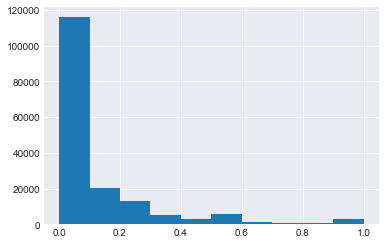

In [7]:
user_mean_open.hist()

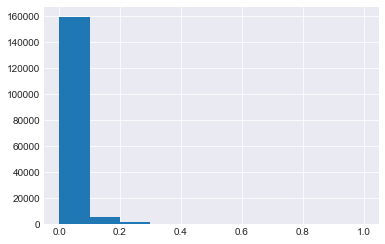

In [8]:
user_mean_click.hist()

In [9]:
tr = tr.assign(mean_click = tr.user_id.map(tr.groupby('user_id')['is_click'].mean()))
tr = tr.assign(mean_open = tr.user_id.map(tr.groupby('user_id')['is_open'].mean()))

In [10]:
tr.head()

,id,user_id,campaign_id,is_open,is_click,mean_click,mean_open
send_date,,,,,,,
2017-07-01 18:01:00,29_170634,170634,29,0,0,0.0,0.000
2017-07-01 18:01:00,29_7740,7740,29,0,0,0.0,0.125
2017-07-01 18:01:00,29_20155,20155,29,0,0,0.0,0.000
2017-07-01 18:01:00,29_134093,134093,29,0,0,0.0,0.125
2017-07-01 18:01:00,29_82171,82171,29,0,0,0.0,0.000


In [11]:
click_users = tr[tr.mean_click>0]
open_users = tr[tr.mean_open>0]

In [12]:
open_users = pd.merge(open_users,cd,left_on='campaign_id',right_index=True,how='left',sort=False)

In [13]:
click_users = pd.merge(click_users,cd,left_on='campaign_id',right_index=True,how='left',sort=False)

Mean click rates among click users by communication type
communication_type
Conference         0.125892
Corporate          0.096629
Hackathon          0.218171
Newsletter         0.173075
Others             0.159582
Upcoming Events    0.149582
Webinar            0.187646
Name: is_click, dtype: float64
Mean open among click users by communication type
communication_type
Conference         0.272961
Corporate          0.265169
Hackathon          0.555624
Newsletter         0.279159
Others             0.442243
Upcoming Events    0.278008
Webinar            0.555944
Name: is_open, dtype: float64


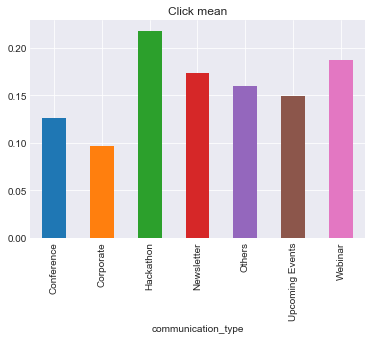

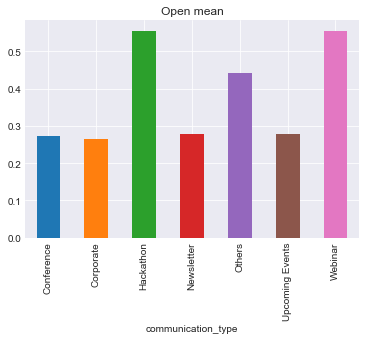

In [97]:
print("Mean click rates among click users by communication type")
_ = click_users.groupby('communication_type').is_click.mean().plot.bar()
_ = plt.title("Click mean")
print(click_users.groupby('communication_type').is_click.mean())
print("Mean open among click users by communication type")
print(click_users.groupby('communication_type').is_open.mean())
_ = plt.figure()
_ = click_users.groupby('communication_type').is_open.mean().plot.bar()
_ = plt.title("Open mean")

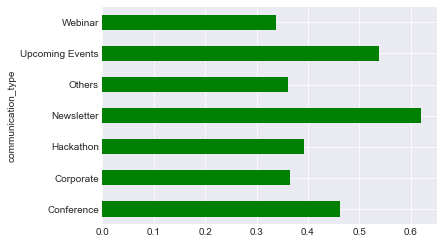

In [98]:
#Another thing of interest could be to see the ratio
(click_users.groupby('communication_type').is_click.mean()/click_users.groupby('communication_type').is_open.mean()).plot.barh(color='g')

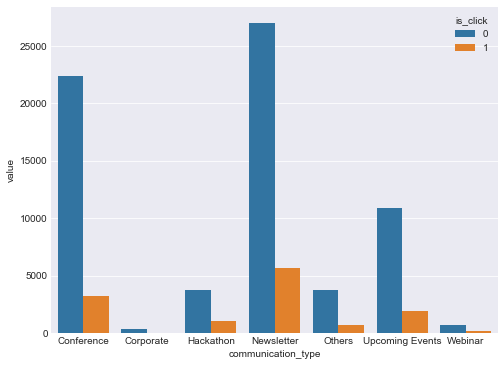

In [17]:
ct = pd.crosstab(click_users.communication_type, click_users.is_click)
ct1 = ct.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(8,6))
sns.barplot(x=ct1.communication_type, y=ct1.value, hue=ct1.is_click)
ct

**Remarks:** It is clear that there is a difference betee

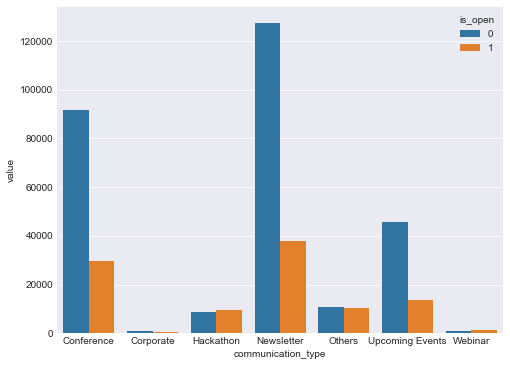

In [18]:
ot = pd.crosstab(open_users.communication_type, open_users.is_open)
ot1 = ot.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(8,6))
sns.barplot(x=ot1.communication_type, y=ot1.value, hue=ot1.is_open)

is_click                 0     1
communication_type              
Conference          118228  3228
Corporate             1198    43
Hackathon            17465  1059
Newsletter          159662  5658
Others               20239   717
Upcoming Events      57352  1916
Webinar               2095   161


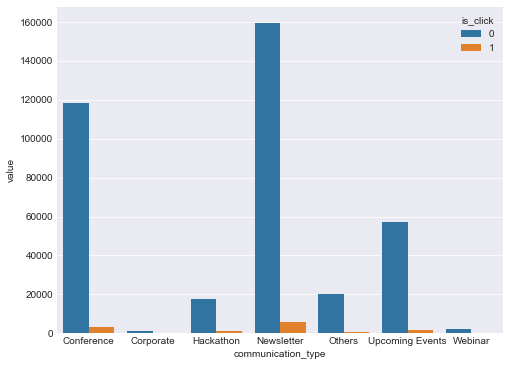

In [19]:
# Let us now see among users who open, what is the plot of click vs no click
ot1 = pd.crosstab(open_users.communication_type, open_users.is_click)
print(ot1)
ot1 = ot1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(8,6))
sns.barplot(x=ot1.communication_type, y=ot1.value, hue=ot1.is_click)

In [20]:
open_stats = open_users.groupby('communication_type').is_click.describe()
open_stats['total_click'] = open_users.groupby('communication_type').is_click.sum()
open_stats

,count,mean,std,min,25%,50%,75%,max,total_click
communication_type,,,,,,,,,
Conference,121456.0,0.026578,0.160846,0.0,0.0,0.0,0.0,1.0,3228
Corporate,1241.0,0.034649,0.182964,0.0,0.0,0.0,0.0,1.0,43
Hackathon,18524.0,0.057169,0.232172,0.0,0.0,0.0,0.0,1.0,1059
Newsletter,165320.0,0.034225,0.181806,0.0,0.0,0.0,0.0,1.0,5658
Others,20956.0,0.034215,0.181784,0.0,0.0,0.0,0.0,1.0,717
Upcoming Events,59268.0,0.032328,0.176871,0.0,0.0,0.0,0.0,1.0,1916
Webinar,2256.0,0.071365,0.257491,0.0,0.0,0.0,0.0,1.0,161


In [21]:
open_stats1 = open_users.groupby('communication_type').is_open.describe()
open_stats1['total_open'] = open_users.groupby('communication_type').is_open.sum()
open_stats1

,count,mean,std,min,25%,50%,75%,max,total_open
communication_type,,,,,,,,,
Conference,121456.0,0.245258,0.430242,0.0,0.0,0.0,0.0,1.0,29788
Corporate,1241.0,0.302981,0.459733,0.0,0.0,0.0,1.0,1.0,376
Hackathon,18524.0,0.520028,0.499612,0.0,0.0,1.0,1.0,1.0,9633
Newsletter,165320.0,0.228684,0.419986,0.0,0.0,0.0,0.0,1.0,37806
Others,20956.0,0.489025,0.499891,0.0,0.0,0.0,1.0,1.0,10248
Upcoming Events,59268.0,0.231322,0.421681,0.0,0.0,0.0,0.0,1.0,13710
Webinar,2256.0,0.544770,0.498102,0.0,0.0,1.0,1.0,1.0,1229


In [22]:
tr1 = pd.merge(tr,cd,left_on='campaign_id',right_index=True,how='left',sort=False)

In [23]:
tr1.groupby('communication_type').is_open.describe()

,count,mean,std,min,25%,50%,75%,max
communication_type,,,,,,,,
Conference,332633.0,0.089552,0.285540,0.0,0.0,0.0,0.0,1.0
Corporate,2853.0,0.131791,0.338323,0.0,0.0,0.0,0.0,1.0
Hackathon,33265.0,0.289584,0.453576,0.0,0.0,0.0,1.0,1.0
Newsletter,451053.0,0.083817,0.277114,0.0,0.0,0.0,0.0,1.0
Others,50936.0,0.201194,0.400896,0.0,0.0,0.0,0.0,1.0
Upcoming Events,148964.0,0.092036,0.289077,0.0,0.0,0.0,0.0,1.0
Webinar,3487.0,0.352452,0.477802,0.0,0.0,0.0,1.0,1.0


In [24]:
click_users.groupby('communication_type').is_click.describe()

,count,mean,std,min,25%,50%,75%,max
communication_type,,,,,,,,
Conference,25641.0,0.125892,0.331734,0.0,0.0,0.0,0.0,1.0
Corporate,445.0,0.096629,0.295785,0.0,0.0,0.0,0.0,1.0
Hackathon,4854.0,0.218171,0.413046,0.0,0.0,0.0,0.0,1.0
Newsletter,32691.0,0.173075,0.378318,0.0,0.0,0.0,0.0,1.0
Others,4493.0,0.159582,0.366258,0.0,0.0,0.0,0.0,1.0
Upcoming Events,12809.0,0.149582,0.356675,0.0,0.0,0.0,0.0,1.0
Webinar,858.0,0.187646,0.390657,0.0,0.0,0.0,0.0,1.0


In [25]:
def merge_campaign(data,campaign) : 
    data = pd.merge(data,campaign,left_on='campaign_id',right_index=True,how='left',sort=False)
   # data = data.drop('campaign_id',axis=1)
    return data
pure_no_click = list(set(tr[tr.is_click==0].user_id.unique())-set(tr[tr.is_click==1].user_id.unique()))
pure_click = list(set(tr[tr.is_click==1].user_id.unique())-set(tr[tr.is_click==0].user_id.unique()))
pure_no_open = list(set(tr[tr.is_open==0].user_id.unique())-set(tr[tr.is_open==1].user_id.unique()))
pure_open = list(set(tr[tr.is_open==0].user_id.unique())-set(tr[tr.is_open==1].user_id.unique()))
g1 = te[te.user_id.isin(tr.user_id.unique())]
g2 = te[~te.user_id.isin(tr.user_id.unique())]
p1 = tr[tr.user_id.isin(g1.user_id.unique())]
p2 = tr[~tr.user_id.isin(g1.user_id.unique())]

## No click users are removed
int_users = set(p1.user_id.unique()) - set(pure_no_click)

## No open users are removed
into_users = set(p1.user_id.unique()) - set(pure_no_open)

trm = p1[p1.user_id.isin(int_users)]
tem = g1[g1.user_id.isin(int_users)] 
print(p1[p1.user_id.isin(int_users)].nunique())
print(g1[g1.user_id.isin(int_users)].nunique())
trm_merge = merge_campaign(trm,cd)
tem_merge = merge_campaign(tem,cd)
trm_sub = trm_merge[trm_merge.communication_type.isin(tem_merge.communication_type.unique())]
tem = tem_merge
trm = trm_merge
trm.shape[0],tem.shape[0]

id             80463
user_id        10069
campaign_id       26
is_open            2
is_click           2
mean_click        57
mean_open         92
dtype: int64
id             50203
campaign_id       26
user_id        10069
dtype: int64


(80463, 50203)

### Some important numbers. Recall the solution in the beginning

In [26]:
total_clicks = tr.is_click.sum()*te.shape[0]/tr.shape[0]
interesting_user_clicks = trm.is_click.sum()*tem.shape[0]/trm.shape[0]
new_user_clicks = total_clicks - interesting_user_clicks
print("Total 1's in test set expected",total_clicks)
print("Total 1's in Common interesting set expected",interesting_user_clicks)
print("Hence total in the new set",new_user_clicks)
print("Click rate expected from new users",new_user_clicks/g2.shape[0])

Total 1's in test set expected 9667.259540007683
Total 1's in Common interesting set expected 7752.287076047376
Hence total in the new set 1914.9724639603064
Click rate expected from new users 0.012607709998487754


In [27]:
print("The P(click | only users who click at least once are present)", trm.is_click.mean())
print("The P(open | only users who click at least once are present)", trm.is_open.mean())

The P(click | only users who click at least once are present) 0.15441880118812373
The P(open | only users who click at least once are present) 0.30251171345835975


In [28]:
print(p1[p1.user_id.isin(into_users)].nunique())
print(g1[g1.user_id.isin(into_users)].nunique())

id             376486
user_id         50303
campaign_id        26
is_open             2
is_click            2
mean_click         58
mean_open          96
dtype: int64
id             227645
campaign_id        26
user_id         50303
dtype: int64


In [29]:
rates_array = pd.DataFrame([[tr.id.nunique(),tr.user_id.nunique(),tr.is_open.mean(),p1.id.nunique(),p1.user_id.nunique(), p1.is_open.mean()],[tr.id.nunique(),tr.user_id.nunique(),tr.is_click.mean(),p1.id.nunique(),p1.user_id.nunique(),p1.is_click.mean()]],index=[['open_rate','click_rate']])
rates_array.columns = [['Train: All User Record count','All User count','All Users rates','Common Record count','Common User count','Common Users rates']]
rates_array

,Train: All User Record count,All User count,All Users rates,Common Record count,Common User count,Common Users rates
open_rate,1023191,168236,0.100460,978820,145737,0.099225
click_rate,1023191,168236,0.012492,978820,145737,0.012694


In [30]:
count_array = pd.DataFrame([[te.id.nunique(),te.user_id.nunique(),g1.id.nunique(),g1.user_id.nunique()]],index=[['count']])
count_array.columns = [['Test: All User Record count','All User count','Common Record count','Common User count']]
count_array

,Test: All User Record count,All User count,Common Record count,Common User count
count,773858,198219,621969,145737


In [31]:
biweekly_mean = trm.resample('2W').is_click.mean()
print(biweekly_mean)
temp = biweekly_mean.shift(1)
temp.fillna(temp[2],inplace=True)
print("lag1",temp)
temp1 = temp.shift(1)
temp1.fillna(temp1[2],inplace=True)
print("lag2",temp1)
print("diff")
diff = temp1 - temp
diff.describe()

send_date
2017-07-02    0.217045
2017-07-16    0.168278
2017-07-30    0.152489
2017-08-13    0.093835
2017-08-27    0.071535
2017-09-10    0.151178
2017-09-24    0.221830
2017-10-08    0.161920
2017-10-22    0.202410
2017-11-05    0.186133
2017-11-19    0.154769
2017-12-03    0.160418
Name: is_click, dtype: float64
lag1 send_date
2017-07-02    0.168278
2017-07-16    0.217045
2017-07-30    0.168278
2017-08-13    0.152489
2017-08-27    0.093835
2017-09-10    0.071535
2017-09-24    0.151178
2017-10-08    0.221830
2017-10-22    0.161920
2017-11-05    0.202410
2017-11-19    0.186133
2017-12-03    0.154769
Name: is_click, dtype: float64
lag2 send_date
2017-07-02    0.217045
2017-07-16    0.168278
2017-07-30    0.217045
2017-08-13    0.168278
2017-08-27    0.152489
2017-09-10    0.093835
2017-09-24    0.071535
2017-10-08    0.151178
2017-10-22    0.221830
2017-11-05    0.161920
2017-11-19    0.202410
2017-12-03    0.186133
Name: is_click, dtype: float64
diff


count    12.000000
mean      0.005190
std       0.051177
min      -0.079643
25%      -0.042559
50%       0.019288
75%       0.048767
max       0.059910
Name: is_click, dtype: float64

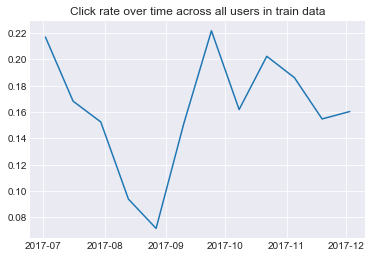

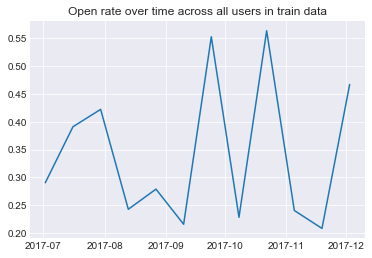

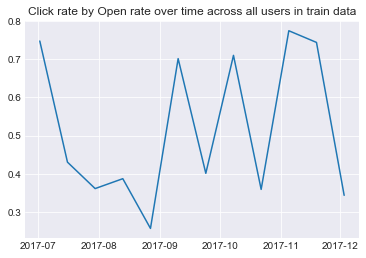

In [32]:
_ = plt.plot(trm.resample('2W').is_click.mean())
_ = plt.title('Click rate over time across all users in train data')
_ = plt.figure()
_ = plt.plot(trm.resample('2W').is_open.mean())
_ = plt.title('Open rate over time across all users in train data')
_ = plt.figure()
_ = plt.plot(trm.resample('2W').is_click.mean()/trm.resample('2W').is_open.mean())
_ = plt.title('Click rate by Open rate over time across all users in train data')

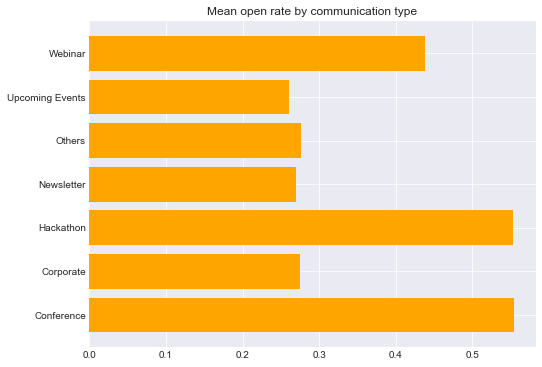

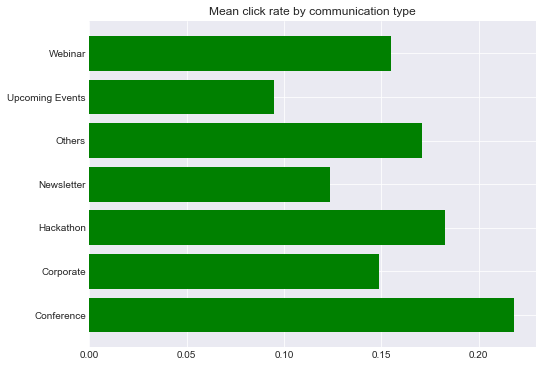

In [33]:
ctype_mean_click = trm.groupby('communication_type').is_click.mean() 
ctype_mean_open = trm.groupby('communication_type').is_open.mean()
_ = plt.figure(figsize=(8,6))
_ = plt.barh(trm.communication_type.unique(),ctype_mean_open,color='orange')
_ = plt.title('Mean open rate by communication type')
_ = plt.figure(figsize=(8,6))
_ = plt.title('Mean click rate by communication type')
_ = plt.barh(trm.communication_type.unique(),ctype_mean_click,color='g')

### Text Analysis Starts here

In [34]:
import nltk
import string
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    """
    Produces lemmatized tokens using provided stemmer.
    """
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    """
    Tokenizes the text and returns stems of all tokens.
    """
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems
def tokenize_text(campaign,max_features=100,max_df=1.0,min_df=2,col_name='email_body',ngram_range = (1,2)) :
    stop =stopwords.words('english') + list(string.punctuation) +  ['July','August','septemb','October','novemb','December'] + ["''", "'s", "'s largest", '00:00', '00:00 hr', '1', '10', '11:59', '11:59 pm', '12', '15', '2', '2017', '2017.', '2018','24', '25', '3', '5', '``']
    vectorizer = TfidfVectorizer(stop_words=stop,max_df=max_df, min_df=min_df, max_features = max_features, ngram_range = ngram_range, tokenizer = tokenize)
    vectorizer.fit(campaign[col_name])
    X = vectorizer.transform(campaign.loc[:54,col_name])
    X = X.tocsc() # some versions of sklearn return COO formatmax_features = 100, ngram_range = (1,1), stop_words = 'english', tokenizer = tokenize
    feat = vectorizer.get_feature_names()
    print("Shape :",X.shape)
    return X,vectorizer
def transform_text(campaign,vectorizer=None,col_name='email_body') :
    X = vectorizer.transform(campaign.loc[55:,col_name])
    X = X.tocsc() # some versions of sklearn return COO formatmax_features = 100, ngram_range = (1,1), stop_words = 'english', tokenizer = tokenize
    feat = vectorizer.get_feature_names()
    print("Shape :",X.shape)
    return X

#Print most frequent that are not punctuation marks or num
def check_punc(line):
    """
    Runs through all tokens and returns None if token is punctuation.
    Returns token if not punctuation.
    """
    for l in line[0]:
        if l in string.punctuation:
            return
    return line   #,'2017.','2017','2018',"'s",'24','3','\x96','15','abinbev',


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aparn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aparn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Body or Subject Analysis

In [35]:
def feature_generate(cd,max_features=100,max_df=0.2,min_df=2,col_name='email_body') :
    X , vect_one = tokenize_text(cd,max_features=max_features,max_df=max_df,min_df=min_df,col_name='email_body')
    print(X.toarray().shape)
    num_feat = X.toarray().shape[1]
    body_feat = vect_one.get_feature_names()
    print(body_feat)
    #Zip together words and their frequencies
    freq_one = zip(body_feat, np.asarray(X.sum(axis=0)).ravel())
    sort_freq_one = sorted(list(freq_one), key=lambda x: x[1], reverse = True)

    no_punc = [(lambda x: check_punc(x))(x) for x in sort_freq_one]
    no_punc_index = [i for i in range(len(no_punc)) if no_punc[i] is not None]

    short = [x for x in no_punc if x is not None]
    print("Most Frequent")
    for feature, score in short[0:20]:
        print('Feature is \"',feature, '\" with frequency',score)
    print("Least Frequent")
    for feature, score in short[-20:]:
        print('Feature is \"',feature, '\" with frequency',score) 
    yi = np.cumsum(np.asarray(X.sum(axis=0)).ravel())
    _ = plt.plot(np.arange(len(yi)),np.asarray(X.sum(axis=0)).ravel())
    tr_features = pd.DataFrame(X.toarray(),index=cd.index[:26])

    test = transform_text(cd,col_name='email_body',vectorizer=vect_one)
    test_features = pd.DataFrame(test.toarray(),index=cd.index[26:])
    
    return tr_features, test_features, vect_one

Shape : (26, 163)
(26, 163)
['across', 'addit', 'advanc', 'algorithm', 'analyt vidhya', 'announc', 'articl', 'artifici', 'artifici intellig', 'attend', 'befor', 'bengaluru', 'best', 'best data', 'big', 'build', 'busi', 'cash', 'cash prize', 'challeng', 'chanc', 'chang', 'come part', 'commun', 'compani', 'competit', 'confer', 'contest', 'creat', 'data engin', 'data scientist', 'datahack', 'datahack summit', 'date', 'day', 'dear hacker', 'deep', 'deep learn', 'deliv', 'dream', 'eager', 'end', 'engin', 'event', 'excit', 'excit event', 'expert', 'februari', 'find', 'first', 'futur', 'global', 'go', 'ha', 'hacker', 'happen', 'help', 'hire', 'hire hackathon', 'hour', 'hunt', 'identifi', 'includ', 'india', 'industri', 'intellig', 'intellig machin', 'interview', 'invit', 'jain', 'januari', 'join', 'keep', 'know', 'kunal', 'kunal jain', 'languag', 'languag process', 'largest', 'last', 'lead', 'leader', 'learn upcom', 'like', 'look', 'make', 'mckinsey', 'meet', 'meetup', 'miss', 'model', 'month'

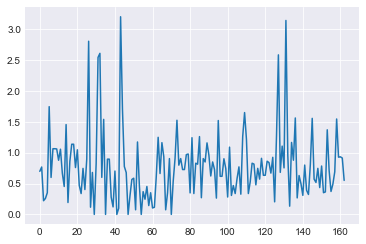

In [36]:
otr_features, ote_features, o_vect_one = feature_generate(cd,max_features=200,max_df=0.4,min_df=0.1,col_name='subject')
num_feat_sub = otr_features.shape[1]

Shape : (26, 318)
(26, 318)
['across', 'addit', 'advanc', 'ai', 'aim', 'algorithm', 'also', 'analysi', 'analyt onlin', 'analyt vidhya', 'announc', 'announc new', 'appli', 'applic', 'articl', 'artifici', 'artifici intellig', 'attend', 'august', 'avbyt', 'avian announc', 'avian eager', 'away', 'awesom', 'back', 'bangalor', 'befor', 'bengaluru', 'best', 'best data', 'better', 'big', 'bird', 'book', 'born', 'build', 'busi', 'busi problem', 'case', 'case studi', 'cash', 'cash prize', 'center', 'center bengaluru', 'challeng', 'challeng meetup', 'chanc', 'chang', 'check', 'click', 'click predict', 'code', 'come part', 'commun', 'compani', 'competit', 'competit come', 'comput', 'conduct', 'confer', 'connect', 'contest', 'convent', 'convent center', 'craft', 'creat', 'custom', 'data engin', 'data scientist', 'datahack', 'datahack summit', 'date', 'day', 'dear hacker', 'deep', 'deep learn', 'deliv', 'detail', 'develop', 'dr.', 'dr. kirk', 'dream', 'eager', 'eager know', 'earli', 'earli bird', 'e

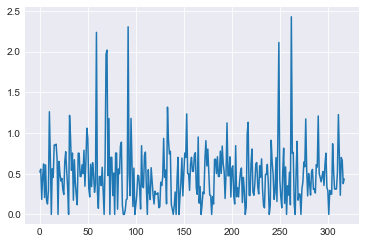

In [37]:
ctr_features, cte_features, c_vect_one = feature_generate(cd,max_features=None,max_df=0.4,min_df=4,col_name='email_body')
num_feat_body= ctr_features.shape[1]

In [38]:
temX = merge_campaign(tem,ote_features)
trmX = merge_campaign(trm,otr_features)
print(trmX.isnull().any().sum())
print(temX.isnull().any().sum())

0
0


0
0


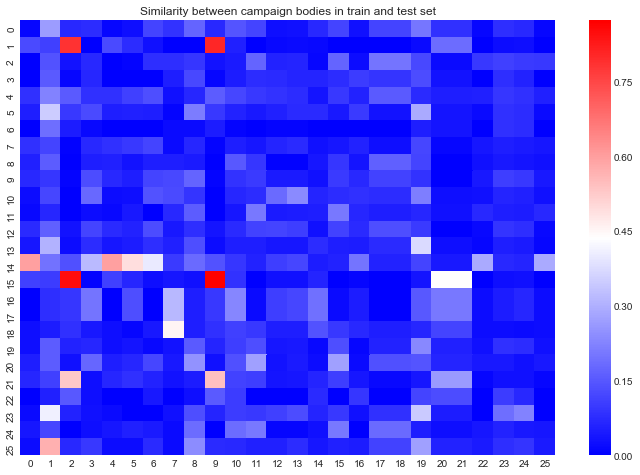

In [39]:
temXb = merge_campaign(tem,cte_features)
trmXb = merge_campaign(trm,ctr_features)
print(trmXb.isnull().any().sum())
print(temXb.isnull().any().sum())
trmXb['click_rate'] = trmXb.user_id.map(trmX.groupby('user_id')['is_click'].mean())
trmXb['open_rate'] = trmXb.user_id.map(trmX.groupby('user_id')['is_open'].mean())
#trmXb['click_rate_by_type'] = trmXb['click_rate'] * trmXb.communication_type.map(trmX.groupby('communication_type')['is_click'].mean())
#trmXb['open_rate_by_type'] = trmXb['open_rate']* trmXb.communication_type.map(trmX.groupby('communication_type')['is_open'].mean())
similar = pd.DataFrame(np.dot(ctr_features,cte_features.T))
_ = plt.figure(figsize=(12,8))
_ = sns.heatmap(similar,cmap='bwr')
_ = plt.title('Similarity between campaign bodies in train and test set')

In [40]:
temXb['open_rate'] = temXb.user_id.map(trmX.groupby('user_id')['is_open'].mean())
temXb['click_rate'] = temXb.user_id.map(trmX.groupby('user_id')['is_click'].mean())
#temXb['click_rate_by_type'] = temXb['click_rate'] * temXb.communication_type.map(trmX.groupby('communication_type')['is_click'].mean())
#temXb['open_rate_by_type'] = temXb['open_rate']  * temXb.communication_type.map(trmX.groupby('communication_type')['is_open'].mean())
print(temXb.isnull().any().sum())
temXb.fillna(0,inplace=True)

0


In [41]:
# Time Stamp related Features
# Define a function to do feature engineering
def feature_eng(df) :
    df = df.assign(wk_day = df.index.weekday)   
    df = df.assign(time_elapsed = df.index - datetime(2017,6,30))
    df = df.assign(lag = df.groupby('user_id')['time_elapsed'].shift(1))
    df.lag = df.lag.fillna(0)
    df = df.assign(interval = df.time_elapsed-df.lag)
    df['interval'] = df.interval.apply(lambda x : np.log(np.round(x.days+x.seconds/3600/24,2)))
    cat_list = pd.get_dummies(df['wk_day'],prefix='wk_day', drop_first=True) 
    df.drop(['time_elapsed','lag','wk_day'],axis=1,inplace=True)
    df = pd.concat([df,cat_list],axis=1)
    return df


In [42]:
temXb.head()

,id,campaign_id,user_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,...,310,311,312,313,314,315,316,317,open_rate,click_rate
send_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 08:00:00,56_38619,56,38619,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,...,0.0,0.0,0.0,0.0,0.088477,0.287634,0.0,0.0,0.250000,0.125000
2018-01-02 08:00:00,56_29713,56,29713,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,...,0.0,0.0,0.0,0.0,0.088477,0.287634,0.0,0.0,0.230769,0.076923
2018-01-02 08:00:00,56_41058,56,41058,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,...,0.0,0.0,0.0,0.0,0.088477,0.287634,0.0,0.0,0.166667,0.166667
2018-01-02 08:00:00,56_10622,56,10622,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,...,0.0,0.0,0.0,0.0,0.088477,0.287634,0.0,0.0,0.300000,0.100000
2018-01-02 08:00:00,56_39758,56,39758,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,...,0.0,0.0,0.0,0.0,0.088477,0.287634,0.0,0.0,0.500000,0.166667


In [43]:
trmXb = feature_eng(trmXb)
temXb = feature_eng(temXb)
temXb = temXb.assign(wk_day_5 = 0)
temXb = temXb.assign(wk_day_6 = 0)

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score,f1_score,roc_curve,auc

def find_auc_score(clf,Xin,yin,color='b',name='My Classifier',label=1,prob=1) :
    '''Function to plot Receiver characteristics and find AUC'''
    if prob == 1:
        yscore = clf.predict_proba(Xin)
    else :
        yscore = clf.decision_function(Xin)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(yin, yscore[:,label],pos_label=label)
    fpr = (false_positive_rate > 0.4).argmin()
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate,color ,label='AUC '+name+' = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.01,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return roc_auc

In [45]:
import time
def build_rf_model(n_estimators=50,max_features=25,min_samples_leaf=4,max_depth=6):
    rf = RandomForestClassifier(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_test)
    rf_test = rf.score(X_test,y_test)
    auc_metric = np.round(find_auc_score(rf,X_test,y_test,color='b',name='My Classifier',label=1,prob=1),4)
    return rf
def build_nb_model():
    nb = MultinomialNB()
    nb.fit(X_train,y_train)
    y_pred = nb.predict_proba(X_test)
    nb_test = nb.score(X_test,y_test)
    auc_metric = np.round(find_auc_score(nb,X_test,y_test,color='b',name='My Classifier',label=1,prob=1),4)
    return nb

def build_lr_model(C=100000):
    lr = LogisticRegression(C=C)
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)
    lr_test = lr.score(X_test,y_test)
    auc_metric = np.round(find_auc_score(lr,X_test,y_test,color='b',name='My Classifier',label=1,prob=1),4)
    return lr

Wall time: 5.79 s


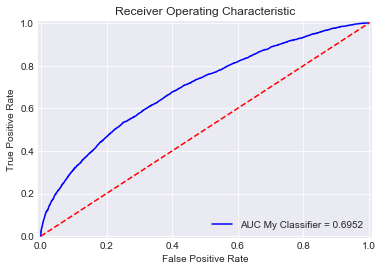

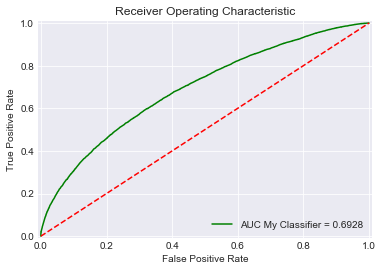

In [46]:
%%time
X_train,X_test,y_train,y_test = train_test_split(pd.concat([trmX.iloc[:,-num_feat_sub:],trmXb.iloc[:,-num_feat_body-9:]],axis=1),trmX.is_click,test_size=0.3,random_state=42,stratify=trmX.is_click)
do_rf1 = 0
if (do_rf1 == 0) :
    clfb =  build_lr_model()
    ypredb = clfb.predict_proba(X_test)
    test_pred = clfb.predict_proba(pd.concat([temX.iloc[:,-num_feat_sub:],temXb.iloc[:,-num_feat_body-9:]],axis=1))
    plt.figure()
    find_auc_score(clfb,X_train,y_train,color='g')
else :
    rf1 =  build_rf_model(n_estimators=100,max_features=100)#,min_samples_leaf=6,max_depth=12)
    ypredb = rf1.predict_proba(X_test)
    test_pred = rf1.predict_proba(pd.concat([temX.iloc[:,-num_feat_sub:],temXb.iloc[:,-num_feat_body-9:]],axis=1))
    plt.figure()
    find_auc_score(rf1,X_train,y_train,color='g')

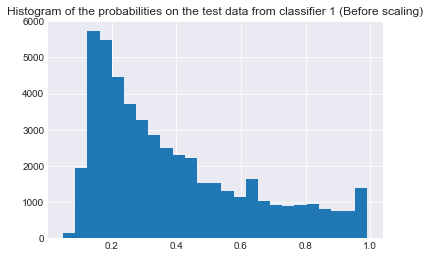

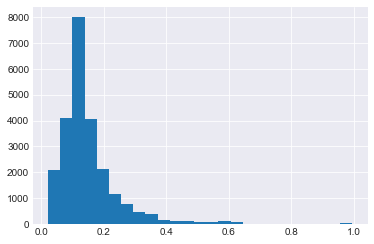

In [47]:
_ = pd.Series(test_pred[:,1]).hist(bins=25)
_ = plt.title("Histogram of the probabilities on the test data from classifier 1 (Before scaling)")
_ = plt.figure()
pd.Series(ypredb[:,1]).hist(bins=25)

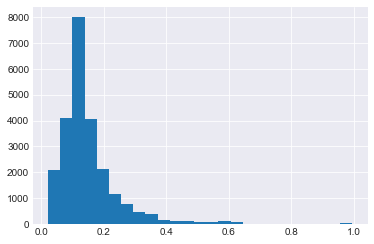

In [48]:
pd.Series(ypredb[:,1]).hist(bins=25)

In [49]:
def prepare_my_submit(predicted1,predicted2) : 
    pp = te.copy()
    pp = pp.assign(is_click = 0)
    pp.loc[pp.user_id.isin(temX.user_id.unique()),'is_click'] = predicted1
    pp.loc[pp.user_id.isin(g2.user_id.unique()),'is_click'] = predicted2
    pp.loc[pp.user_id.isin(pure_click),'is_click'] = 1
     # It is always a good practice to assign an infinitesimally small value to prevent underflow, incase log is taken
    pp.loc[pp.user_id.isin(pure_no_click),'is_click'] = 0.000001   
    sum_1 = pp.is_click.value_counts()*pp.is_click.value_counts().index
    sub_df = pp[['id','is_click']]
    sub_df.to_csv('aparna_final_submission_corrected.csv',index=False)
    return sub_df

### Classifier 2: For the new users in test set.    
This is a bit tough to train as there is no previous mean open or click information. However, to mimic the scenario, a new bunch of users from start of a month are taken and their mean and distributions are similar to original distribution of the train set. These are 20% of the total set and hence did not give so much attention as given to the other one. The first one was more important. [Recall Pareto Principle](https://en.wikipedia.org/wiki/Pareto_principle)

In [50]:
new_users_oct = set(tr['2017-10-01':'2017-10-31'].user_id.unique()) - set(tr['2017-09-01':'2017-09-30'].user_id.unique())
q2 = tr[tr.user_id.isin(new_users_oct)]
q2.nunique()

id             54897
user_id        10445
campaign_id       20
is_open            2
is_click           2
mean_click        24
mean_open         40
dtype: int64

In [51]:
new_users_nov = set(tr['2017-11-01':'2017-11-30'].user_id.unique()) - set(tr['2017-10-01':'2017-10-31'].user_id.unique())
r2 = tr[tr.user_id.isin(new_users_nov)]
r2.nunique()

id             294085
user_id         59217
campaign_id        23
is_open             2
is_click            2
mean_click         40
mean_open          61
dtype: int64

In [52]:
print("Mean of the new users clicks oct",q2.is_click.mean())
print("Mean of the new users clicks sep",r2.is_click.mean())

Mean of the new users clicks oct 0.012277537934677668
Mean of the new users clicks sep 0.01068398592243739


In [53]:
g2mX = merge_campaign(g2,ote_features)
p2mX = merge_campaign(q2,otr_features)
g2mXb = merge_campaign(g2,cte_features)
p2mXb = merge_campaign(q2,ctr_features)

r2mX = merge_campaign(r2,otr_features)
r2mXb = merge_campaign(r2,ctr_features)


In [54]:
%%time
p2mXb = feature_eng(p2mXb)
g2mXb = feature_eng(g2mXb)
r2mXb = feature_eng(r2mXb)

g2mXb = g2mXb.assign(wk_day_5 = 0)
g2mXb = g2mXb.assign(wk_day_6 = 0)


Wall time: 18.9 s


Wall time: 17.1 s


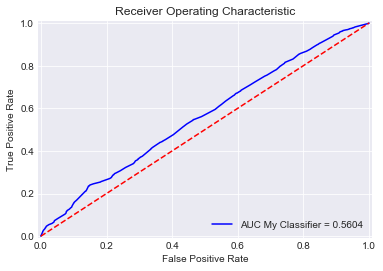

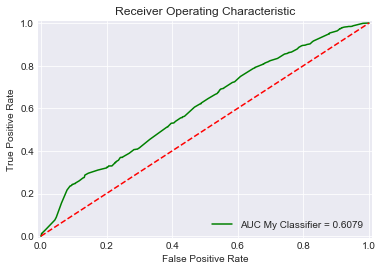

In [55]:
%%time
X_train = pd.concat([p2mX.iloc[:,-num_feat_sub:],p2mXb.iloc[:,-num_feat_body-7:]],axis=1)
X_test = pd.concat([r2mX.iloc[:,-num_feat_sub:],r2mXb.iloc[:,-num_feat_body-7:]],axis=1)
y_train = p2mXb.is_click
y_test = r2mXb.is_click 
do_rf2 = 0
if (do_rf2 == 0) :
    clfb2 =  build_lr_model(C=10000)
    ypredb2 = clfb2.predict_proba(X_test)
    test_pred2 = clfb2.predict_proba(pd.concat([g2mX.iloc[:,-num_feat_sub:],g2mXb.iloc[:,-num_feat_body-7:]],axis=1))
    plt.figure()
    find_auc_score(clfb2,X_train,y_train,color='g')
else :
    rf2 =  build_rf_model(n_estimators=100,max_features=100)#,min_samples_leaf=6,max_depth=6)
    ypredb2 = rf2.predict_proba(X_test)
    test_pred2 = rf2.predict_proba(pd.concat([g2mX.iloc[:,-num_feat_sub:],g2mXb.iloc[:,-num_feat_body-7:]],axis=1))
    plt.figure()
    find_auc_score(rf2,X_train,y_train,color='g')

### V2 of notebook starts here: Some additional comments and possible corrections to code
Even after contest was over, I could not rest, since something did not feel right. Hence I spent a day investigating what went wrong. I kept getting 0.644 kind of score, which is just a little above commonsense (by submitting mean click rate observed) despite training classifiers. Hence investigated reasons.

A few cells are edited, new cells are added with comments.

In [76]:
## This cell was in V1, only first two lines
n1,n2 = test_pred[:,1].sum(), test_pred2[:,1].sum()
n1,n2
## Added in V2
print("Total Number of clicks from common users and new users:",np.round(n1),"and",np.round(n2),"respectively")
pAgivenA1 = n1/g1.shape[0]
pAgivenA2 = n2/g2.shape[0]
print("The click rate from common users and new users respectively:",np.round(pAgivenA1pA1,4),"and",np.round(pAgivenA2pA2,4),"respectively")
test_click_rate = (n1+n2)/te.shape[0]
print("Overall click Rate:",np.round(test_click_rate,4))

Total Number of clicks from common users and new users: 19653.0 and 3605.0 respectively
The click rate from common users and new users respectively: 0.0316 and 0.0237 respectively
Overall click Rate: 0.0301


**Note:**  This Markdown cell and two more cells below are also added in the V2.         
In the submission version V1, I made a mistake of interpreting predictions as P(A|A1) and P(A|A2) respectively. 
In reality they are, P(A|A1)\*P(A1) and P(A|A2)\*P(A2) respectively.

Cross check by applying the total probability formula. 

In [77]:
# Added in V2
total_prob_from_2_classifiers = pAgivenA1 *  (g1.shape[0]/te.shape[0]) + pAgivenA2 * (g2.shape[0]/te.shape[0])
print("Total -theoretical- click prob from two classifiers:",np.round(total_prob_from_2_classifiers,4))
print("Difference observed",np.round(test_click_rate - total_prob_from_2_classifiers,4))

Total -theoretical- click prob from two classifiers: 0.0301
Difference observed 0.0


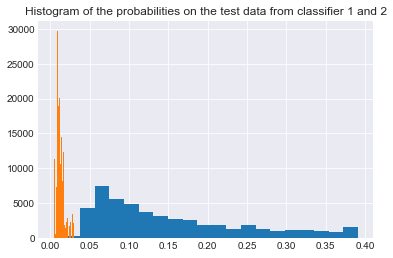

In [79]:
# As in V1
_ =  pd.Series(test_pred[:,1]*7752/n1).hist(bins=20)
_ =  pd.Series(test_pred2[:,1]*1914/n2).hist(bins=20)
_ = plt.title("Histogram of the probabilities on the test data from classifier 1 and 2")

The probabilities are just fine. When they are interleaved, I would expect good AUC.
## Biggest Edit in V2: 
No. The probabilities are NOT just fine. The above cell had a bug. It is because of assumption on the click rate on the test data and concluding there should be 9667 overall clicks, 7752 should come from 1 set and 1914 should come from the other and if they didnt, scale it appropriately. What should've been done is, just leave them as they are. Added another cell below. In the output one can see that due to not scaling, the results from two classifiers interfere less than before. 
Here is a good resource on AUC [Quora answer on why AUC-ROC is insensitive to class imbalance](https://www.quora.com/Why-is-AUC-Area-under-ROC-insensitive-to-class-distribution-changes) If one scrolls below the technique I used is explained very well. The class prior probabilities do not come into the picture. Hence I should've submitted it just as it comes from the classifier. **I just used two different classifiers for two population groups, with two different mean click rates**

Probabilities of various populations are, 0.06487365899170132 0.19627502720137285 0.7388513138069258


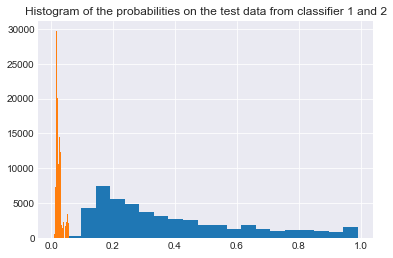

In [95]:
## This cell also added in V2
PA1inTest = test_pred[:,1].shape[0]/te.shape[0]
PA2inTest = test_pred2[:,1].shape[0]/te.shape[0]
PA3inTest = (g1.shape[0] - test_pred[:,1].shape[0])/te.shape[0]

print("Probabilities of various populations are,",PA1inTest,PA2inTest,PA3inTest)

_ = pd.Series(test_pred[:,1]).hist(bins=20)
_ = pd.Series(test_pred2[:,1]).hist(bins=20)
_ = plt.title("Histogram of the probabilities on the test data from classifier 1 and 2")

Range of good thresholds:0.03019738 to 0.06081006
Mean click rate 0.0128


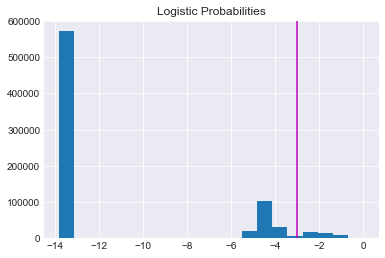

In [94]:
# Submission as in competition - V1 version
sub_df = prepare_my_submit(test_pred[:,1]*7752/n1,test_pred2[:,1]*1914/n2)
_ = np.log(sub_df.is_click).hist(bins=20)
_ = plt.title('Logistic Probabilities')
_ = plt.axvline(-3,color='m')
print("Range of good thresholds:{:.8f} to {:.8f}".format(np.exp(-3.5),np.exp(-2.8)))
# Added in V2, in this cell itself.
print("Mean click rate",np.round(sub_df.is_click.mean(),4))

### More Correct submission would have been this:

Note the mean click rate coinciding with outputs in above cells

Mean click rate 0.0301


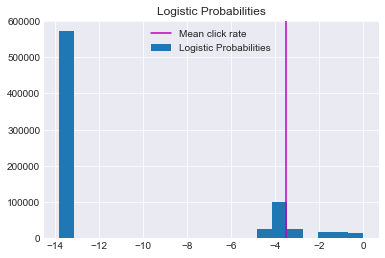

In [93]:
# V2: The more correct submission is this. I say more correct because the earlier one is not drastically wrong.
sub_df = prepare_my_submit(test_pred[:,1],test_pred2[:,1])
_ = np.log(sub_df.is_click).hist(bins=20)
_ = plt.title('Logistic Probabilities')
_ = plt.axvline(np.log(np.round(test_click_rate,4)),color='m')
_ = plt.legend(['Mean click rate','Logistic Probabilities'],loc='best')
print("Mean click rate",np.round(sub_df.is_click.mean(),4))
## Some concluding remarks added below

### Concluding Remarks

1. This was a good business problem to work on.
2. It was challenging to do EDA and modeling in one week. 
3. I got good ranking for a first timer and may be a little better had I not done mistake. 
4. Had fun correcting the mistake after the contest got over.
5. I am happy with the approach taken.
6. Learnt by interacting with a lot of people on the slack channel. Got numerous approaches to this for learning from.

##### Advantages of this 2 classifier approach over single classifier:

+ Almost same performance with lower efforts
+ Least amount of feature engineering.
+ About 40 sec total run time on classifiers, compared to 45-60 mins run time for single.
+ Logistic Regression models could do the job, because of class being more balanced on the first classifier at least.
+ No hyperparameter tuning was required to achieve the same performance.
+ Although due to mistake in the final submit, and not modeling no opener users' behaviors AUC in the competition might have been low, I am pretty sure that this model would do well in industry problems. Perhaps this is the standard technique, I feel like I learnt something new.